[0.9987875, 0.0012125, 0.0]
[[9.98787500e-01 1.21250000e-03 0.00000000e+00]
 [9.92834121e-01 3.42935111e-03 3.73652746e-03]
 [9.76425512e-01 9.42223912e-03 1.41522490e-02]
 [9.34348113e-01 2.39687527e-02 4.16831342e-02]
 [8.43538255e-01 5.08762600e-02 1.05585485e-01]
 [7.02321239e-01 7.75843282e-02 2.20094432e-01]
 [5.60356082e-01 7.84128832e-02 3.61231035e-01]
 [4.62754877e-01 5.64047466e-02 4.80840377e-01]
 [4.08915764e-01 3.29386418e-02 5.58145594e-01]
 [3.81909932e-01 1.72417257e-02 6.00848342e-01]
 [3.68845789e-01 8.55202325e-03 6.22602187e-01]
 [3.62613413e-01 4.13356186e-03 6.33253025e-01]
 [3.59657103e-01 1.97349811e-03 6.38369398e-01]
 [3.58258259e-01 9.36738200e-04 6.40805003e-01]
 [3.57597107e-01 4.43409290e-04 6.41959484e-01]]
[  97.          274.34808883  753.77912973 1917.50021899 4070.10080347
 6206.74625843 6273.03065253 4512.37972884 2635.09134782 1379.33805897
  684.1618596   330.68494879  157.87984873   74.93905598   35.47274323]


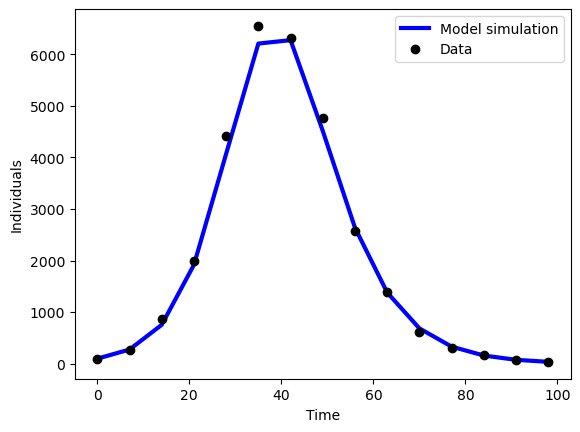

error: Extra arguments must be in a tuple.

In [2]:
# Part 1: Code from PDF

from math import * # useful math functions
import numpy as np # useful array objects
# (also a core scientific computing library)
import scipy.stats as stats #useful statistics functions
import copy #allows for deep copies of objects

# model equations for the scaled SIR model for python 2.7
def model(ini, time_step, params):
    Y = np.zeros(3) #column vector for the state variables S, I, and R
    X = ini #our initial conditions as defined from the input, also a column vector of our state vars
    beta = params[0]
    gamma = params[1]
    Y[0] = -beta*X[0]*X[1] #S
    Y[1] = beta*X[0]*X[1] - gamma*X[1] #I
    Y[2] = gamma*X[1] #R
    return Y

# Part 2: Updated model with birth/death

def model(ini, time_step, params):
    Y = np.zeros(3) #column vector for the state variables
    X = ini
    mu = 0
    beta = params[0]
    gamma = params[1]
    Y[0] = mu - beta*X[0]*X[1] - mu*X[0] #S
    Y[1] = beta*X[0]*X[1] - gamma*X[1] - mu*X[1] #I
    Y[2] = gamma*X[1] - mu*X[2] #R
    return Y

# Load Data
times = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]
data = [97, 271, 860, 1995, 4419, 6549, 6321, 4763, 2571, 1385, 615, 302, 159, 72, 34]

params = [0.4, 0.25, 80000.0] #make sure all the params and inition states are float
paramnames = ['beta', 'gamma', 'k']

def x0fcn(params, data):
    S0 = 1.0 - (data[0]/params[2])
    I0 = data[0]/params[2]
    R0 = 0.0
    X0 = [S0, I0, R0]
    return X0

ini = x0fcn(params,data)
print(ini)

def yfcn(res, params):
    return res[:,1]*params[2]

from scipy.integrate import odeint as ode # ode solver
#### Simulate the model ####
res = ode(model, ini, times, args=(params,))
print(res)

sim_measure = yfcn(res, params)
print(sim_measure)

import matplotlib.pyplot as plt # nice plotting commands, very similar to Matlab commands
plt.plot(times, sim_measure, 'b-', linewidth=3, label='Model simulation')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.show()

# Part 4: Maximum Likelihood Estimation

from scipy.stats import poisson
from scipy.stats import norm

def NLL(params, data, times):
    params = np.abs(params)
    data = np.array(data)
    
    #Simulate the model with current parameters
    res = ode(model, x0fcn(params,data), times, args=(params,))
    
    #Apply the measurement equation
    y = yfcn(res, params)
    
    #Calculate the NLL for Poisson distribution
    nll = sum(y) - sum(data*np.log(y))
    return nll

import scipy.optimize as optimize #optimizer function package
optimizer = optimize.minimize(NLL, params, args=(data, times), method='Nelder-Mead')
paramests = np.abs(optimizer.x)

#### Re-generate initial case data based on new parameter estimates
iniests = x0fcn(paramests, data)

#### Re-simulate and plot the model with the final parameter estimates ####
#Simulate data
xest = ode(model, iniests, times, args=(paramests))

#Apply the measurement equation
est_measure = yfcn(xest, paramests)

#Plot
plt.plot(times, est_measure, 'b-', linewidth=3, label='Model simulation')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.show()

[0.9987875, 0.0012125, 0.0]
[[9.98787500e-01 1.21250000e-03 0.00000000e+00]
 [9.92834121e-01 3.42935111e-03 3.73652746e-03]
 [9.76425512e-01 9.42223912e-03 1.41522490e-02]
 [9.34348113e-01 2.39687527e-02 4.16831342e-02]
 [8.43538255e-01 5.08762600e-02 1.05585485e-01]
 [7.02321239e-01 7.75843282e-02 2.20094432e-01]
 [5.60356082e-01 7.84128832e-02 3.61231035e-01]
 [4.62754877e-01 5.64047466e-02 4.80840377e-01]
 [4.08915764e-01 3.29386418e-02 5.58145594e-01]
 [3.81909932e-01 1.72417257e-02 6.00848342e-01]
 [3.68845789e-01 8.55202325e-03 6.22602187e-01]
 [3.62613413e-01 4.13356186e-03 6.33253025e-01]
 [3.59657103e-01 1.97349811e-03 6.38369398e-01]
 [3.58258259e-01 9.36738200e-04 6.40805003e-01]
 [3.57597107e-01 4.43409290e-04 6.41959484e-01]]
[  97.          274.34808883  753.77912973 1917.50021899 4070.10080347
 6206.74625843 6273.03065253 4512.37972884 2635.09134782 1379.33805897
  684.1618596   330.68494879  157.87984873   74.93905598   35.47274323]


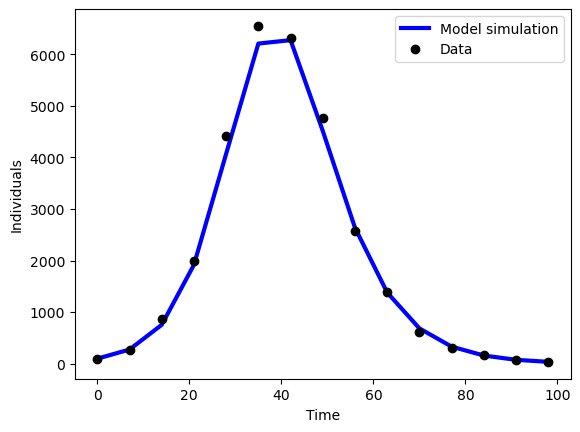

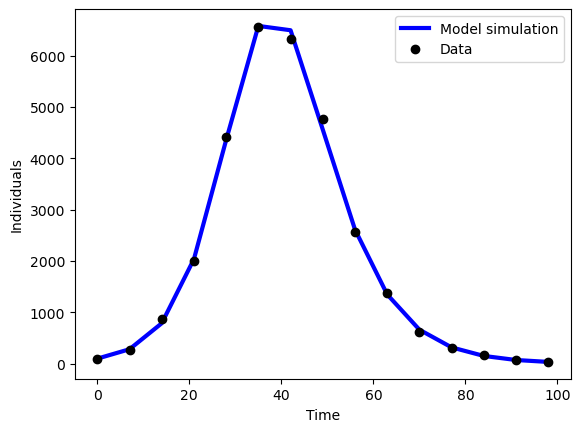

In [3]:
# Part 1: Code from PDF

from math import * # useful math functions
import numpy as np # useful array objects
# (also a core scientific computing library)
import scipy.stats as stats #useful statistics functions
import copy #allows for deep copies of objects

# model equations for the scaled SIR model for python 2.7
def model(ini, time_step, params):
    Y = np.zeros(3) #column vector for the state variables S, I, and R
    X = ini #our initial conditions as defined from the input, also a column vector of our state vars
    beta = params[0]
    gamma = params[1]
    Y[0] = -beta*X[0]*X[1] #S
    Y[1] = beta*X[0]*X[1] - gamma*X[1] #I
    Y[2] = gamma*X[1] #R
    return Y

# Part 2: Updated model with birth/death

def model(ini, time_step, params):
    Y = np.zeros(3) #column vector for the state variables
    X = ini
    mu = 0
    beta = params[0]
    gamma = params[1]
    Y[0] = mu - beta*X[0]*X[1] - mu*X[0] #S
    Y[1] = beta*X[0]*X[1] - gamma*X[1] - mu*X[1] #I
    Y[2] = gamma*X[1] - mu*X[2] #R
    return Y

# Load Data
times = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]
data = [97, 271, 860, 1995, 4419, 6549, 6321, 4763, 2571, 1385, 615, 302, 159, 72, 34]

params = [0.4, 0.25, 80000.0] #make sure all the params and inition states are float
paramnames = ['beta', 'gamma', 'k']

def x0fcn(params, data):
    S0 = 1.0 - (data[0]/params[2])
    I0 = data[0]/params[2]
    R0 = 0.0
    X0 = [S0, I0, R0]
    return X0

ini = x0fcn(params,data)
print(ini)

def yfcn(res, params):
    return res[:,1]*params[2]

from scipy.integrate import odeint as ode # ode solver
#### Simulate the model ####
res = ode(model, ini, times, args=(tuple(params),))  # Fixed: wrapped params in tuple
print(res)

sim_measure = yfcn(res, params)
print(sim_measure)

import matplotlib.pyplot as plt # nice plotting commands, very similar to Matlab commands
plt.plot(times, sim_measure, 'b-', linewidth=3, label='Model simulation')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.show()

# Part 4: Maximum Likelihood Estimation

from scipy.stats import poisson
from scipy.stats import norm

def NLL(params, data, times):
    params = np.abs(params)
    data = np.array(data)
    
    #Simulate the model with current parameters
    res = ode(model, x0fcn(params,data), times, args=(tuple(params),))  # Fixed: wrapped params in tuple
    
    #Apply the measurement equation
    y = yfcn(res, params)
    
    #Calculate the NLL for Poisson distribution
    nll = sum(y) - sum(data*np.log(y))
    return nll

import scipy.optimize as optimize #optimizer function package
optimizer = optimize.minimize(NLL, params, args=(data, times), method='Nelder-Mead')
paramests = np.abs(optimizer.x)

#### Re-generate initial case data based on new parameter estimates
iniests = x0fcn(paramests, data)

#### Re-simulate and plot the model with the final parameter estimates ####
#Simulate data
xest = ode(model, iniests, times, args=(tuple(paramests),))  # Fixed: wrapped paramests in tuple

#Apply the measurement equation
est_measure = yfcn(xest, paramests)

#Plot
plt.plot(times, est_measure, 'b-', linewidth=3, label='Model simulation')
plt.plot(times, data, 'ko', linewidth=2, label='Data')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.show()